In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the Dataset
df=pd.read_csv('df.csv')

In [3]:
# view top 5 rows of the dataset
df.head()

,Manufacturer,Model,Transmission,Fuel Type,Powertrain,Engine Power (PS),Fuel Consumption Comb (L/100 km),CO2 Emissions (G/Km),Engine Capacity (L)
0,ABARTH,595,M5,Petrol,Internal Combustion Engine (ICE),145.0,7.2,162.0,1.4
1,ABARTH,595,M5,Petrol,Internal Combustion Engine (ICE),145.0,7.6,169.0,1.4
2,ABARTH,595,SAT5,Petrol,Internal Combustion Engine (ICE),180.0,7.8,172.0,1.4
3,ABARTH,595,M5,Petrol,Internal Combustion Engine (ICE),180.0,7.7,171.0,1.4
4,ABARTH,595,M5,Petrol,Internal Combustion Engine (ICE),165.0,7.3,165.0,1.4


# Dataset information

In [4]:
#checking rows and cols in our dataset
df.shape

(6629, 9)

In [5]:
#concise information about the Dataset, including data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Manufacturer                      6629 non-null   object 
 1   Model                             6629 non-null   object 
 2   Transmission                      6629 non-null   object 
 3   Fuel Type                         6629 non-null   object 
 4   Powertrain                        6629 non-null   object 
 5   Engine Power (PS)                 6629 non-null   float64
 6   Fuel Consumption Comb (L/100 km)  6629 non-null   float64
 7   CO2 Emissions (G/Km)              6629 non-null   float64
 8   Engine Capacity (L)               6629 non-null   float64
dtypes: float64(4), object(5)
memory usage: 466.2+ KB


Checking for Null Values

In [6]:
#checking for null values
df.isna().sum()

Manufacturer                        0
Model                               0
Transmission                        0
Fuel Type                           0
Powertrain                          0
Engine Power (PS)                   0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions (G/Km)                0
Engine Capacity (L)                 0
dtype: int64

In [7]:
#Descriptive statistics for numeric columns in the Dataset
df.describe(include=np.number).transpose().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Engine Capacity (L),6629.0,1.857339,0.835414,0.9,1.3,1.6,2.0,6.8
Fuel Consumption Comb (L/100 km),6629.0,6.970086,1.971345,1.1,5.7,6.5,7.6,20.1
CO2 Emissions (G/Km),6629.0,164.701312,51.486938,5.0,134.0,153.0,185.0,2019.0
Engine Power (PS),6629.0,191.576407,115.728251,60.0,120.0,150.0,204.0,835.0


In [8]:
#Descriptive statistics for onject type columns in the Dataset
df.describe(include=object)

,Manufacturer,Model,Transmission,Fuel Type,Powertrain
count,6629,6629,6629,6629,6629
unique,40,656,54,7,5
top,MERCEDES-BENZ,Duster,M6,Petrol,Internal Combustion Engine (ICE)
freq,1390,91,1638,3207,4988


# Feature Engineering

In [9]:
#Removing spaces and ''-'' from the powertrain column
df['Powertrain']=df['Powertrain'].str.replace(' ','_').str.replace('-','_') 

In [10]:
 #Removing spaces Fule Type column
df['Fuel Type']=df['Fuel Type'].str.replace(' / ','/')

In [11]:
# #Removing spaces and '-' from the Transmission Column
df['Transmission'] = df['Transmission'].replace([' ', '-'], '_', regex=True)

In [12]:
#removing duplicated duplicates
df=df.drop_duplicates();

In [13]:
#removing duplicated values helps keep our data unique 
dup=df.duplicated().sum() 
print('dupliacted values are ',dup)

dupliacted values are  0


# Handling Outliers

Text(0.5, 1.0, 'With Outlier')

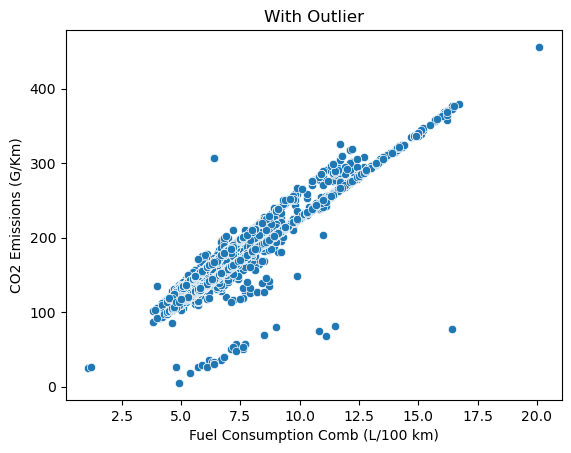

In [61]:
sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions (G/Km)')
plt.title('With Outlier')

In [15]:
outlier_index=df[(df['Fuel Consumption Comb (L/100 km)']>8)&(df['CO2 Emissions (G/Km)']>1800)].index
df=df.drop(outlier_index,axis=0)

Text(0.5, 1.0, 'Without Outlier')

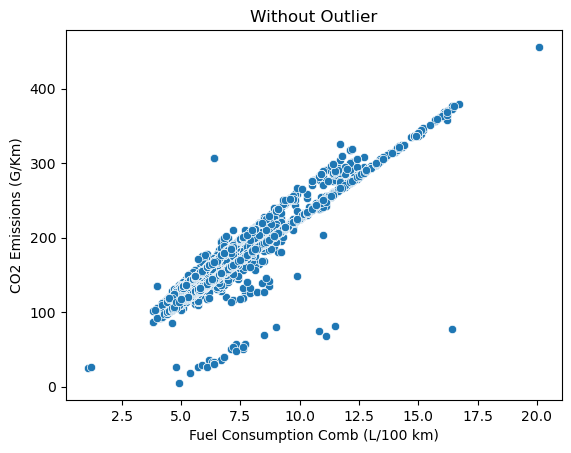

In [16]:
sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions (G/Km)')
plt.title('Without Outlier')

Text(0.5, 1.0, 'With Outlier')

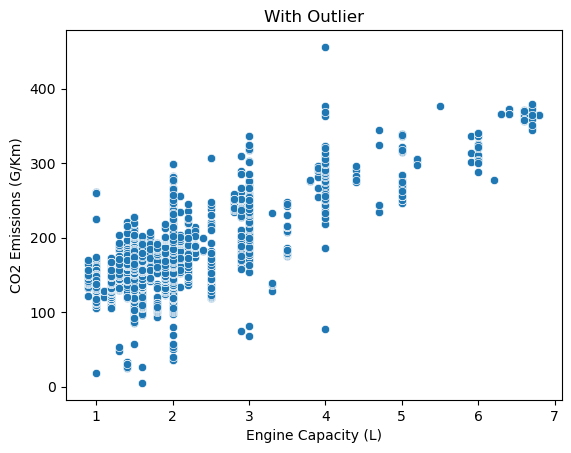

In [62]:
sns.scatterplot(data=df,x='Engine Capacity (L)',y='CO2 Emissions (G/Km)')
plt.title('With Outlier')

In [18]:
outlier_index1=df[(df['Engine Capacity (L)']>2)&(df['CO2 Emissions (G/Km)']>1800)].index
df=df.drop(outlier_index1,axis=0)

Text(0.5, 1.0, 'Without Outlier')

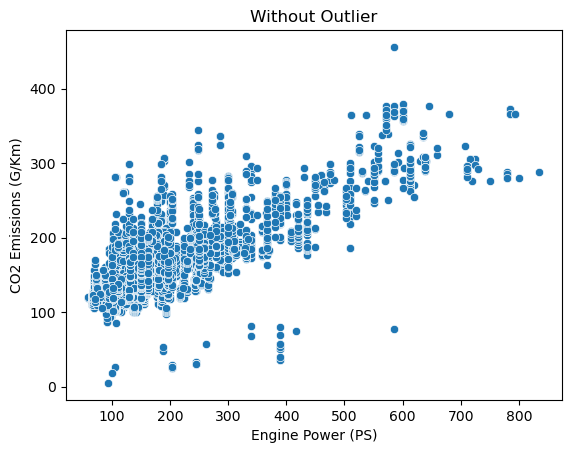

In [19]:
sns.scatterplot(data=df,x='Engine Power (PS)',y='CO2 Emissions (G/Km)')
plt.title('Without Outlier')

In [20]:
df.to_csv('df_without_outliers.csv')

# Why we should Remove Outliers 

Outliers can disproportionately influence model parameters and predictions, leading to biased or less robust results. By excluding extreme values, models are better able to capture the underlying patterns in the majority of the data, enhancing the model's performance and interpretability.

# Correlation

In [21]:
df_no_outliers=pd.read_csv('df_without_outliers.csv')
df_no_outliers.max()

Unnamed: 0                                                            6628
Manufacturer                                                         VOLVO
Model                                                           i30 Tourer
Transmission                                                          eCVT
Fuel Type                                                       Petrol/LPG
Powertrain                          Plug_in_Hybrid_Electric_Vehicle_(PHEV)
Engine Power (PS)                                                    835.0
Fuel Consumption Comb (L/100 km)                                      20.1
CO2 Emissions (G/Km)                                                 456.0
Engine Capacity (L)                                                    6.8
dtype: object

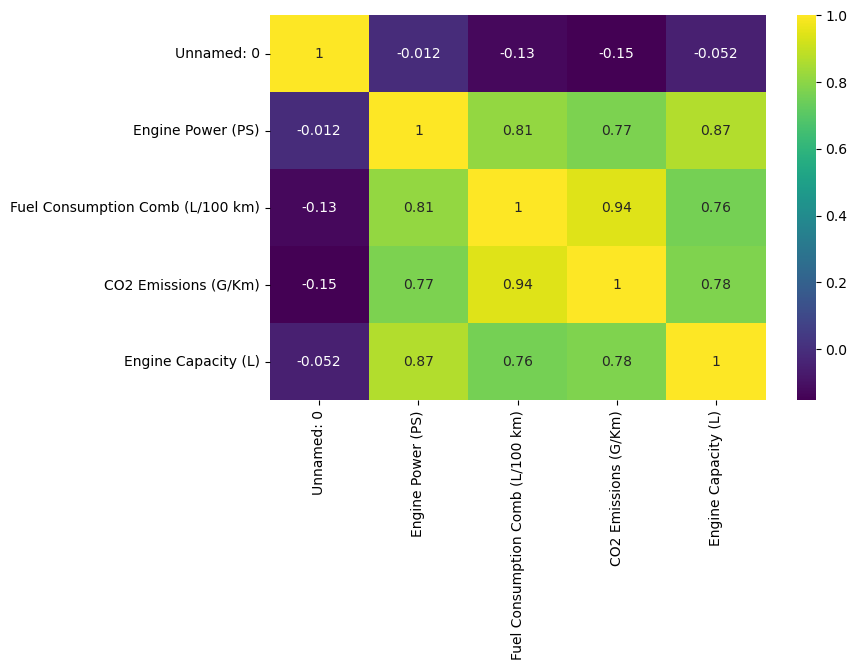

In [22]:
#lets calculate and visualize the correlation of numeric features
plt.figure(figsize=(8,5))
correlation=df_no_outliers.corr(numeric_only=True) 
sns.heatmap(correlation,annot=True,cmap='viridis');

<Figure size 1600x800 with 0 Axes>

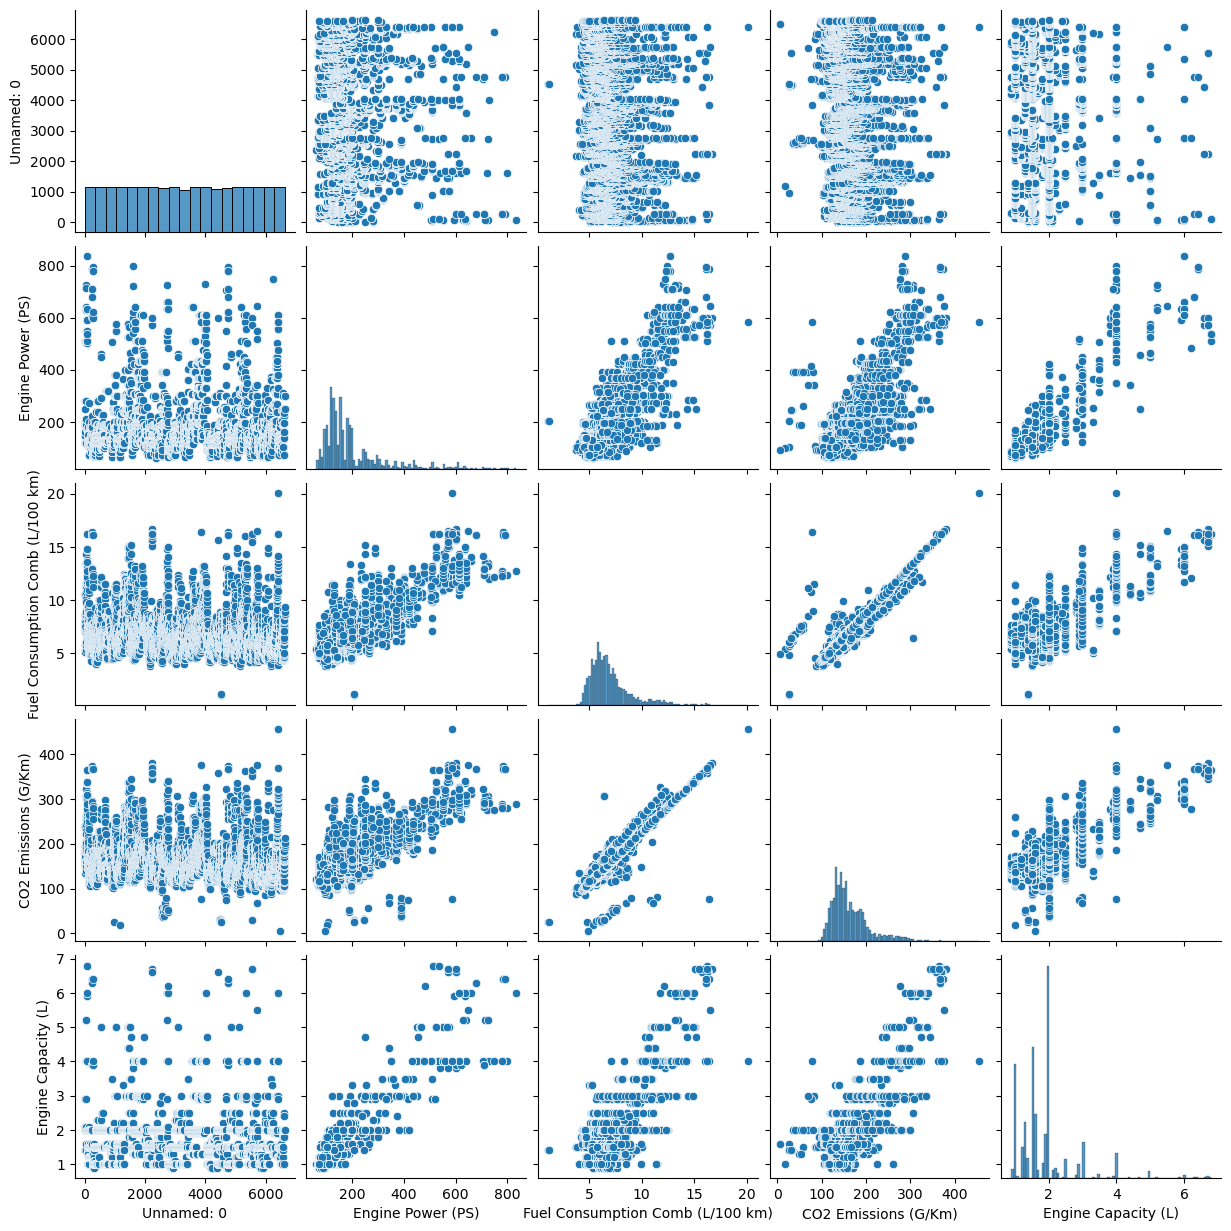

In [23]:
#create a figure of specific size
plt.figure(figsize=(16,8))
#pariplot for different visual insights like data distribution and trends
sns.pairplot(df_no_outliers)

# Separating Features and Labels

In [24]:
#Features
x=df_no_outliers.drop(['CO2 Emissions (G/Km)','Manufacturer','Model'],axis=1) 

In [25]:
#Lables
y=df_no_outliers['CO2 Emissions (G/Km)']

In [26]:
from sklearn.model_selection import train_test_split

# Splitting dataset into test and train

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [67]:
df_no_outliers['Engine Power (PS)'].max()

835.0

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Random Froest Regressor

In [29]:
rf_model=RandomForestRegressor(n_estimators=200, min_samples_split=2)

In [30]:
#Let's make a pipeline which will contain StandardScaler and Encoder to convert categorcial features to numerical ones
from sklearn.pipeline import Pipeline

In [31]:
numeric_features = ['Engine Power (PS)', 'Fuel Consumption Comb (L/100 km)', 'Engine Capacity (L)']
numeric_transformer = StandardScaler() #standarization

categorical=['Transmission','Fuel Type','Powertrain'] #categorical columns which are to be transformed to numerical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical)
    ])

In [32]:
# Creating the pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', rf_model)])

In [33]:
pipeline_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Power (PS)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Engine Capacity (L)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transmission', 'Fuel Type',
                                                   'Powertrain'])])),
                ('model', RandomForestRegressor(n_estimators=200))])

In [34]:
y_pred = pipeline_rf.predict(x_test)
#let's compare actual values and predicted values
actual_vs_predicted={'Actual':y_test,'Predicted':y_pred}
pd.DataFrame(actual_vs_predicted).head()

,Actual,Predicted
634,177.0,177.541949
4852,121.0,121.107500
6045,125.0,125.603833
5714,133.0,133.160833
6266,157.0,158.009131


# Let's Try Linear Regression model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
Lr_model=LinearRegression()

In [37]:
pipeline_Lr = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', Lr_model)])

In [38]:
pipeline_Lr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Power (PS)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Engine Capacity (L)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transmission', 'Fuel Type',
                                                   'Powertrain'])])),
                ('model', LinearRegression())])

In [39]:
y_preds = pipeline_Lr.predict(x_test)
#let's compare actual values and predicted values
actual_vs_predicted={'Actual':y_test,'Predicted':y_preds}
pd.DataFrame(actual_vs_predicted).head()

,Actual,Predicted
634,177.0,173.633396
4852,121.0,120.124249
6045,125.0,124.190606
5714,133.0,132.395558
6266,157.0,157.906172


# Let's Try Decision Tree Regressor, Gradient Boosting Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()

# Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor()

# Decision Tree Regressor

In [41]:
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', decision_tree_model)])
pipeline_dt.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Power (PS)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Engine Capacity (L)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transmission', 'Fuel Type',
                                                   'Powertrain'])])),
                ('model', DecisionTreeRegressor())])

In [42]:
y_preds_dt = pipeline_dt.predict(x_test)
#let's compare actual values and predicted values
actual_vs_predicted={'Actual':y_test,'Predicted':y_preds_dt}
pd.DataFrame(actual_vs_predicted).head()

,Actual,Predicted
634,177.0,177.5
4852,121.0,121.0
6045,125.0,125.0
5714,133.0,133.0
6266,157.0,156.0


# Gradient Boosting Regressor

In [43]:
gradient_boosting_model = GradientBoostingRegressor()

In [44]:
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model',gradient_boosting_model)])
pipeline_gb.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Power (PS)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Engine Capacity (L)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transmission', 'Fuel Type',
                                                   'Powertrain'])])),
                ('model', GradientBoostingRegressor())])

In [45]:
y_preds_gb = pipeline_gb.predict(x_test)
#let's compare actual values and predicted values
actual_vs_predicted={'Actual':y_test,'Predicted':y_preds_gb}
pd.DataFrame(actual_vs_predicted).head()

,Actual,Predicted
634,177.0,176.080737
4852,121.0,121.718487
6045,125.0,126.985596
5714,133.0,133.820954
6266,157.0,159.379960


# Lasso Regression

In [46]:
from sklearn.linear_model import Lasso,Ridge

In [47]:
model_Lasso=Lasso(alpha=0.8)

In [48]:
pipeline_Lasso= Pipeline(steps=[('preprocessor', preprocessor),
                            ('model',model_Lasso)])
pipeline_Lasso.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Power (PS)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Engine Capacity (L)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transmission', 'Fuel Type',
                                                   'Powertrain'])])),
                ('model', Lasso(alpha=0.8))])

In [49]:
y_preds_lasso = pipeline_Lasso.predict(x_test)
#let's compare actual values and predicted values
actual_vs_predicted={'Actual':y_test,'Predicted':y_preds_lasso}
pd.DataFrame(actual_vs_predicted).head()

,Actual,Predicted
634,177.0,170.720341
4852,121.0,123.614042
6045,125.0,127.635046
5714,133.0,134.897198
6266,157.0,158.997746


# Ridge Regression

In [50]:
model_r=Ridge()
pipeline_r= Pipeline(steps=[('preprocessor', preprocessor),
                            ('model',model_r)])
pipeline_r.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Power (PS)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Engine Capacity (L)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transmission', 'Fuel Type',
                                                   'Powertrain'])])),
                ('model', Ridge())])

In [51]:
y_preds_ridge = pipeline_r.predict(x_test)
#let's compare actual values and predicted values
actual_vs_predicted={'Actual':y_test,'Predicted':y_preds_ridge}
pd.DataFrame(actual_vs_predicted).head()

,Actual,Predicted
634,177.0,173.626978
4852,121.0,120.131307
6045,125.0,124.179192
5714,133.0,132.391309
6266,157.0,157.895117


# Evaluation and Error Collection

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# Mean Absolute Error (MAE)

In [53]:
MAE_rf=mean_absolute_error(y_test,y_pred)
print(f'Mean absolute Error for Random Forest Regressor: {MAE_rf}')
MAE_lr=mean_absolute_error(y_test,y_preds)
print(f'Mean absolute Error for Linear Regression: {MAE_lr}')
MAE_dt=mean_absolute_error(y_test,y_preds_dt)
print(f'Mean absolute Error for Decision Tree: {MAE_dt}')
MAE_gb=mean_absolute_error(y_test,y_preds_gb)
print(f'Mean absolute Error for Gradient Boosting: {MAE_gb}')
MAE_lasso= mean_absolute_error(y_test, y_preds_lasso)
print(f'Mean absolute Error for lasso regression: {MAE_lasso}')
MAE_r= np.sqrt(mean_squared_error(y_test, y_preds_ridge))
print(f'Mean absolute Error for ridge regression: {MAE_r}')

Mean absolute Error for Random Forest Regressor: 2.2904678319706706
Mean absolute Error for Linear Regression: 3.6098663290278696
Mean absolute Error for Decision Tree: 2.2081832809053767
Mean absolute Error for Gradient Boosting: 3.166978575338377
Mean absolute Error for lasso regression: 4.542619447176476
Mean absolute Error for ridge regression: 7.482815641938569


# Root Mean sqaured Error (RMSE)

In [54]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error for Random Forest Regressor: {rmse_rf}')
rmse_Lr = np.sqrt(mean_squared_error(y_test, y_preds))
print(f'Root Mean Squared Error for Linear Regression: {rmse_Lr}')
rmse_gb= np.sqrt(mean_squared_error(y_test, y_preds_gb))
print(f'Root Mean Squared Error for Gradient: {rmse_gb}')
rmse_dt= np.sqrt(mean_squared_error(y_test, y_preds_dt))
print(f'Root Mean Squared Error for Decision Tree: {rmse_dt}')
rmse_lasso= np.sqrt(mean_squared_error(y_test, y_preds_lasso))
print(f'Root Mean Squared Error for lasso regression: {rmse_lasso}')
rmse_r= np.sqrt(mean_squared_error(y_test, y_preds_ridge))
print(f'Root Mean Squared Error for ridge regression: {rmse_r}')

Root Mean Squared Error for Random Forest Regressor: 6.441639113045819
Root Mean Squared Error for Linear Regression: 7.476323022825078
Root Mean Squared Error for Gradient: 6.635304676574413
Root Mean Squared Error for Decision Tree: 7.284267313561646
Root Mean Squared Error for lasso regression: 9.060893778610453
Root Mean Squared Error for ridge regression: 7.482815641938569


# Mean Sqaured Error

In [55]:
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Random Forest Regressor: {mse_rf}')
mse_Lr = mean_squared_error(y_test, y_preds)
print(f'Mean Squared Error for Linear Regression: {mse_Lr}')
mse_gb= mean_squared_error(y_test, y_preds_gb)
print(f'Mean Squared Error for Gradient: {mse_gb}')
mse_dt= (mean_squared_error(y_test, y_preds_dt))
print(f'Mean Squared Error for Decision Tree: {mse_dt}')
mse_lasso= mean_squared_error(y_test, y_preds_lasso)
print(f'Mean Squared Error for lasso regression: {mse_lasso}')
mse_r=mean_squared_error(y_test, y_preds_ridge)
print(f'Mean Squared Error for ridge regression: {mse_r}')

Mean Squared Error for Random Forest Regressor: 41.49471446272173
Mean Squared Error for Linear Regression: 55.895405941624304
Mean Squared Error for Gradient: 44.02726815097027
Mean Squared Error for Decision Tree: 53.060550295422594
Mean Squared Error for lasso regression: 82.09979606726162
Mean Squared Error for ridge regression: 55.99252993124052


# Mean Absolute Percentage Error

In [56]:
mape_rf=mean_absolute_percentage_error(y_test,y_pred)*100
print(f"MAPE for Random Forest Refressor: {mape_rf:.2f}%")
mape_dt = mean_absolute_percentage_error(y_test,y_preds_dt) * 100
print(f"MAPE for Decsion Tree: {mape_dt:.2f}%")
mape_gb = mean_absolute_percentage_error(y_test,y_preds_gb) * 100
print(f"MAPE for Gradeint Boosting: {mape_gb:.2f}%")
mape_lr = mean_absolute_percentage_error(y_test,y_preds) * 100
print(f"MAPE for Linear Regression: {mape_lr:.2f}%")
mape_r =mean_absolute_percentage_error(y_test,y_preds_ridge) * 100
print(f"MAPE for Ridge Regression: {mape_r:.2f}%")
mape_lasso = mean_absolute_percentage_error(y_test,y_preds_lasso) * 100
print(f"MAPE for Lasso regression: {mape_lasso:.2f}%")

MAPE for Random Forest Refressor: 1.80%
MAPE for Decsion Tree: 1.70%
MAPE for Gradeint Boosting: 2.28%
MAPE for Linear Regression: 2.73%
MAPE for Ridge Regression: 2.73%
MAPE for Lasso regression: 3.41%


# Performance Bargraph

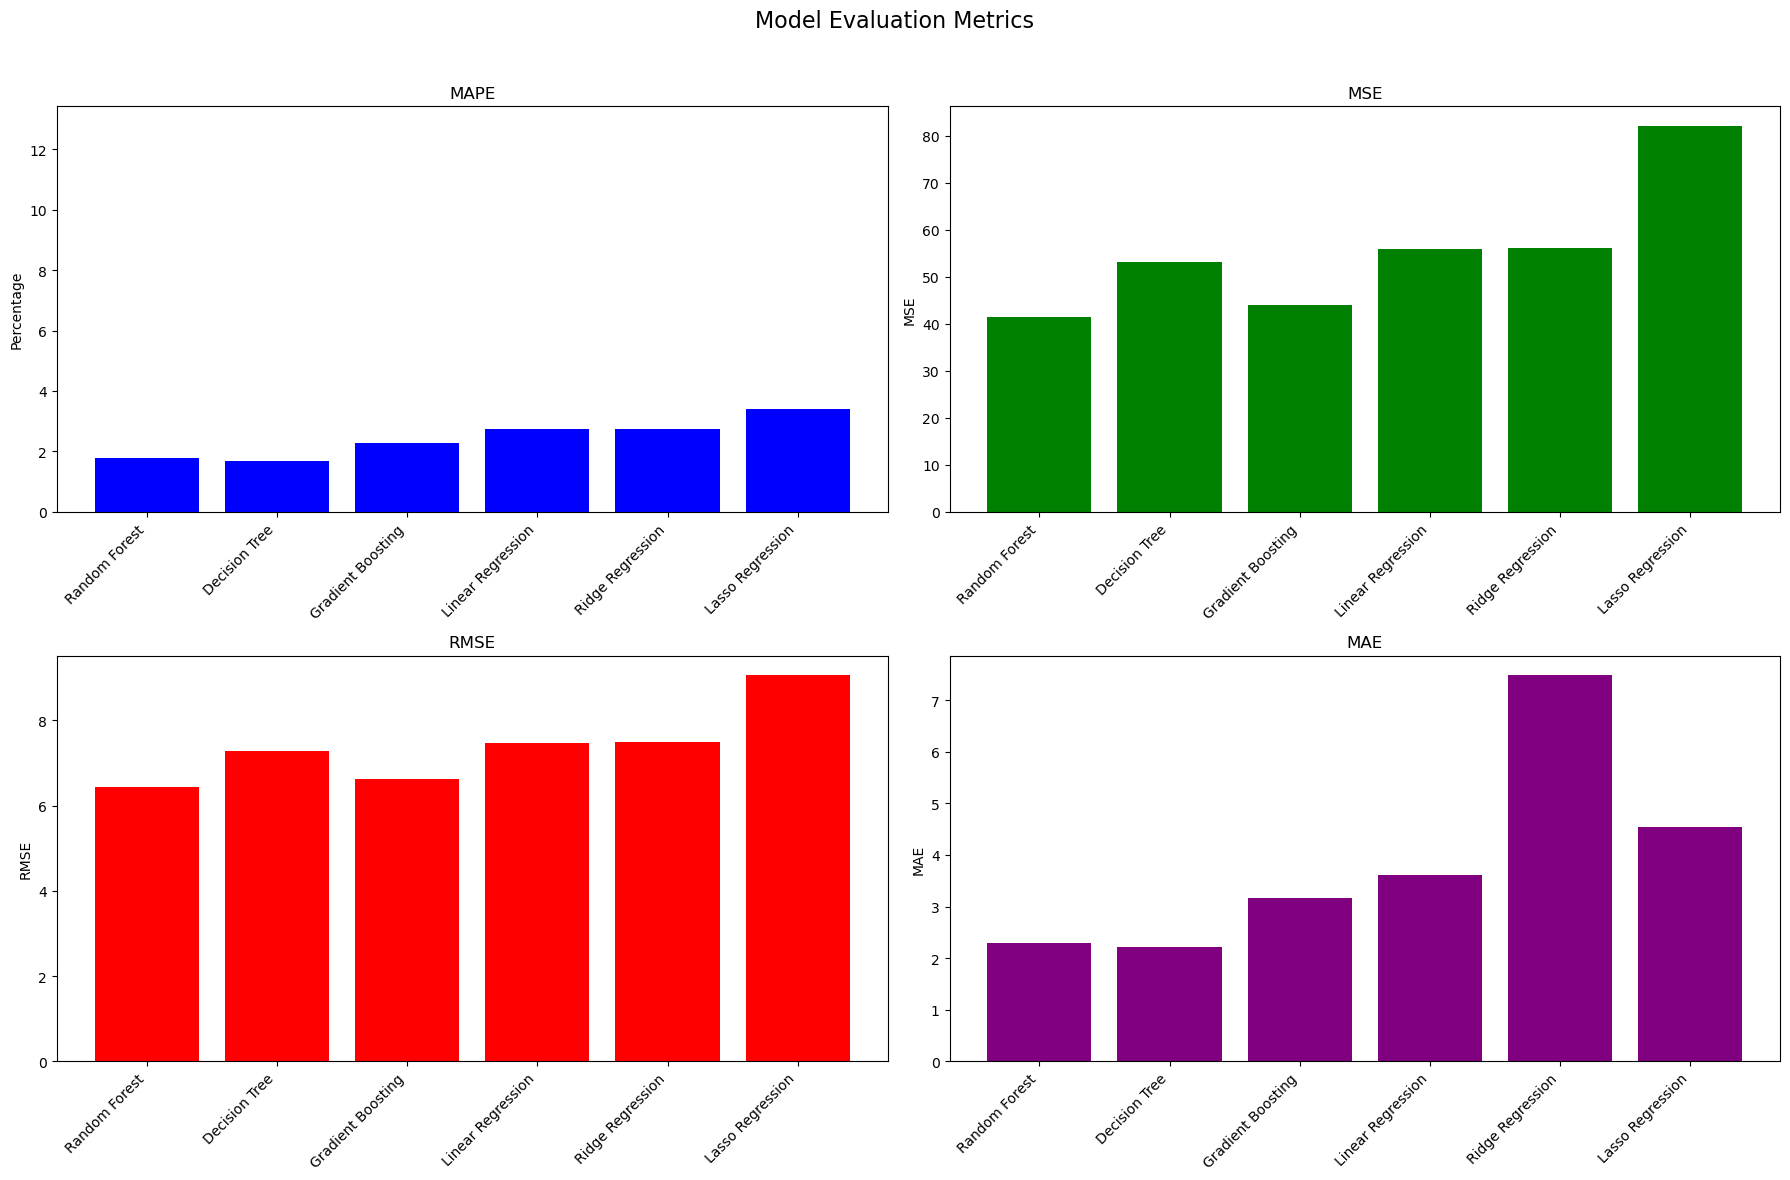

In [57]:
# models and corresponding metrics
models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Linear Regression', 'Ridge Regression', 'Lasso Regression']
mape_values = [mape_rf, mape_dt, mape_gb, mape_lr, mape_r, mape_lasso]
mse_values = [mse_rf, mse_dt, mse_gb, mse_Lr, mse_r, mse_lasso]
rmse_values = [rmse_rf, rmse_dt, rmse_gb, rmse_Lr, rmse_r, rmse_lasso]
mae_values = [MAE_rf, MAE_dt, MAE_gb, MAE_lr, MAE_r, MAE_lasso]

# subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Evaluation Metrics', fontsize=16)

# Mean Absolute Percentage Error (MAPE)
axs[0, 0].bar(models, mape_values, color='blue')
axs[0, 0].set_title('MAPE')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_ylim([0, max(mape_values) + 10])
axs[0, 0].set_xticks(range(len(models)))  # Set tick positions
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')  # Rotate x-axis labels

# Mean Squared Error (MSE)
axs[0, 1].bar(models, mse_values, color='green')
axs[0, 1].set_title('MSE')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].set_xticks(range(len(models)))  # Set tick positions
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')  # Rotate x-axis labels

# Root Mean Squared Error (RMSE)
axs[1, 0].bar(models, rmse_values, color='red')
axs[1, 0].set_title('RMSE')
axs[1, 0].set_ylabel('RMSE')
axs[1, 0].set_xticks(range(len(models)))  # Set tick positions
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')  # Rotate x-axis labels

# Mean Absolute Error (MAE)
axs[1, 1].bar(models, mae_values, color='purple')
axs[1, 1].set_title('MAE')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].set_xticks(range(len(models)))  # Set tick positions
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


# Best Perfroming Model

The Best Performing Model is Random Forest Regressor among others 

# Saving Model and Making Predictions

In [64]:
from joblib import dump, load

dump(pipeline_dt, 'final_model.joblib')
loaded_model = load('final_model.joblib')

In [65]:
user_input = [
    {'Transmission': 'M5', 'Fuel Type': 'Electricity', 'Powertrain': 'Internal_Combustion_Engine_(ICE)', 'Engine Power (PS)': 10.3, 'Fuel Consumption Comb (L/100 km)': 8, 'Engine Capacity (L)': 1.6}
]

#user input to DataFrame
user_input_df = pd.DataFrame(user_input)

#predictions using the pipeline
prediction =loaded_model.predict(user_input_df)

# Display the prediction
print(f"Emitted CO2 is : {prediction[0]:.2f}")

Emitted CO2 is : 181.00


In [60]:
#Ranges and corresponding Vehcile types
ranges_and_types = [
    (1, 50, 'B'),
    (51, 75, 'C'),
    (76, 90, 'D'),
    (91, 100, 'E'),
    (101, 110, 'F'),
    (111, 130, 'G'),
    (131, 150, 'H'),
    (151, 170, 'I'),
    (171, 190, 'J'),
    (191, 225, 'K'),
    (226, 255, 'L'),
    (256, float('inf'), 'M')
]

emission_type = None
for range_start, range_end, emission_category in ranges_and_types:
    if range_start <= prediction[0] <= range_end:
        emission_type = emission_category
        break
print(f"Vehicle is Rated as : {emission_type}")

Vehicle is Rated as : J
